# Conceptos teóricos

Para entrenar nuestra primera red neuronal vamos a utilizar **TensorFlow** y **Keras**.

## TensorFlow

**TensorFlow** es una librería de código abierto desarrollada por Google para construir y entrenar modelos de Machine Learning y Deep Learning.

Permite:

* Crear redes neuronales
* Definir funciones de pérdida
* Aplicar algoritmos de optimización
* Trabajar con tensores (estructuras matemáticas que almacenan datos)

TensorFlow se encarga de realizar todos los cálculos matemáticos necesarios para que el modelo aprenda, incluyendo el cálculo de gradientes y la actualización de pesos.

## Keras

**Keras** es una API de alto nivel integrada dentro de TensorFlow que simplifica la creación de redes neuronales.

En lugar de programar todos los cálculos manualmente, con Keras podemos:

* Definir capas en pocas líneas de código
* Especificar la función de pérdida
* Elegir el optimizador
* Entrenar el modelo fácilmente

Por ejemplo, crear una red sencilla puede hacerse en apenas unas líneas.

## Relación entre ambos

Podemos pensar que:

* **TensorFlow** es el motor matemático.
* **Keras** es la interfaz sencilla que utilizamos para trabajar con ese motor.

En este notebook utilizaremos Keras sobre TensorFlow para construir nuestra primera red neuronal que aprenderá a convertir grados Celsius en Fahrenheit.

## Componentes de Tensorflow

En TensorFlow, todo se representa mediante **tensores**.

Un tensor es simplemente una estructura que almacena números, pero puede tener distintas dimensiones:

* 🔹 **Escalar** → un único número (dimensión 0)
* 🔹 **Vector** → una lista de números (dimensión 1)
* 🔹 **Matriz** → una tabla de números (dimensión 2)
* 🔹 Tensor de dimensión mayor → estructuras más complejas (por ejemplo, imágenes en 3D o 4D)

Por ejemplo:

* Una temperatura individual → escalar
* Una lista de temperaturas → vector
* Un conjunto de datos con varias características → matriz

Cuando entrenamos una red neuronal:

* Las **entradas** son tensores.
* Las **salidas** son tensores.
* Los **pesos y sesgos** también son tensores.
* Las operaciones matemáticas se realizan entre tensores.

---

### ¿Por qué necesitamos tensores?

Las redes neuronales funcionan realizando operaciones matemáticas masivas:

* Multiplicaciones
* Sumas
* Cálculo de gradientes
* Actualización de pesos

TensorFlow está optimizado para realizar estas operaciones de forma muy eficiente, incluso usando GPU.

En nuestro ejemplo de Celsius → Fahrenheit:

* El conjunto de temperaturas en Celsius será un tensor.
* Las temperaturas en Fahrenheit también serán un tensor.
* El peso y el sesgo que la red aprenderá serán tensores internos del modelo.

---

### ¿Qué necesitas saber realmente para empezar?

Para trabajar con TensorFlow y Keras en este primer ejemplo solo necesitas entender que:

* Los datos deben estar en formato numérico.
* Normalmente trabajaremos con arrays (que TensorFlow convertirá en tensores).
* El modelo ajustará automáticamente los tensores que representan los pesos.

No necesitamos manipular tensores complejos manualmente en este ejemplo.
Keras se encargará de gran parte del trabajo por nosotros.

# Primera red neuronal

Sabemos que la fórmula matemática que convierte grados Celsius a Fahrenheit es:

$$
F = 1.8C + 32
$$

Es una relación lineal sencilla, con una pendiente (1.8) y un término independiente (32).

Ahora bien, en lugar de programar directamente esa ecuación, vamos a hacer algo diferente: vamos a entrenar una red neuronal para que la aprenda por sí sola a partir de ejemplos.

Vamos a implementar un perceptrón que permita calcular la conversión de grados Celsius a Fahrenheit. El modelo no conocerá la fórmula explícitamente; solo verá pares de valores (Celsius, Fahrenheit) y ajustará sus parámetros internos hasta aproximarse a esa relación.

## Importar librerías

In [1]:
!pip install tf_keras

# Indicamos que use la versión 2 de Keras, no la 3 (dará error al exportar los modelos)
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

# Importamos las librerías necesarias
import tensorflow as tf
import tf_keras as keras
import numpy as np

In [2]:
print(f"Versión de TensorFlow: {tf.__version__}")
print(f"Versión de Keras (Legacy): {keras.__version__}")

Versión de TensorFlow: 2.19.0
Versión de Keras (Legacy): 2.19.0


## Lectura (creación) del dataset

In [3]:
# Creamos los datos de entrenamiento. Al ser un dataset muy sencillo,
# podemos crear nosotros los datos

# Temperaturas en Celsius (entrada)
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)

# Temperaturas correspondientes en Fahrenheit (salida esperada)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

print("Datos de entrada:", celsius)
print("Datos de salida:", fahrenheit)

Datos de entrada: [-40. -10.   0.   8.  15.  22.  38.]
Datos de salida: [-40.  14.  32.  46.  59.  72. 100.]


## Definición del modelo

En este paso vamos a construir nuestra red neuronal utilizando Keras.

Veamos qué significa cada parte del código:

### `Sequential`

Un **modelo secuencial** es el tipo más sencillo de red neuronal en Keras.

Se llama así porque las capas se apilan **una detrás de otra**, en orden.
La salida de una capa se convierte automáticamente en la entrada de la siguiente.

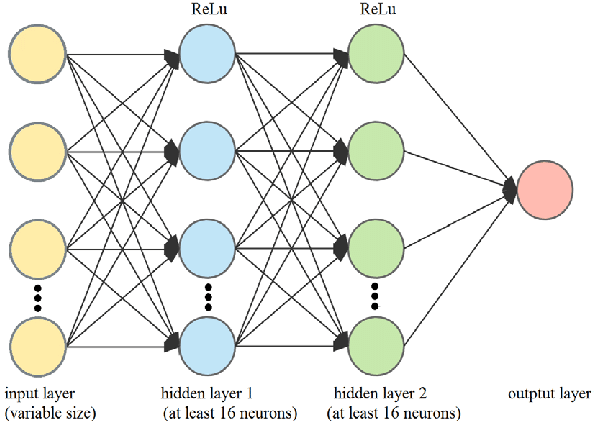

Es adecuado cuando:

* La red tiene un flujo lineal.
* No necesitamos arquitecturas complejas con múltiples ramas.

En nuestro caso solo tenemos una capa, así que un modelo secuencial es suficiente.

### `Dense`

Una **capa densa** (fully connected layer) es una capa en la que:

* Cada neurona está conectada a todas las entradas.
* Cada conexión tiene su propio peso.
* La neurona calcula una suma ponderada más un sesgo.

En este ejemplo estamos creando una capa densa con una sola neurona, es decir, un perceptrón.

### `units=1`

El parámetro `units` indica el número de neuronas que tendrá la capa.

Como estamos resolviendo un problema muy simple (convertir un número en otro número), solo necesitamos:

* 1 neurona
* 1 valor de salida

Si pusiéramos `units=10`, estaríamos creando 10 neuronas en esa capa.

### `input_shape=[1]`

`input_shape` indica la forma de los datos de entrada.

En este caso:

* `[1]` significa que cada ejemplo tiene una sola característica.
* Es decir, cada entrada es un único número (grados Celsius).

Si tuviéramos varias características (por ejemplo temperatura, humedad y presión), el `input_shape` sería `[3]`.

In [4]:
# Definimos el modelo (un perceptrón)

# Creamos un modelo secuencial con una sola capa y una sola neurona
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])  # 1 neurona, 1 entrada
])

## Compilación del modelo

Antes de entrenar la red neuronal, debemos **compilar el modelo**.

Compilar significa preparar el modelo para el entrenamiento indicando tres elementos fundamentales:

### Optimizador (`optimizer`)

El optimizador es el algoritmo que se encargará de **actualizar los pesos y el sesgo** para reducir la función de pérdida.

En este caso usamos **Adam**, uno de los optimizadores más utilizados en Deep Learning.

También indicamos el `learning_rate`, que controla cuánto se modifican los pesos en cada actualización.

### Función de pérdida (`loss`)

La función de pérdida mide el error entre:

* El valor real
* El valor predicho por el modelo

Como estamos resolviendo un problema de regresión, usamos el **error cuadrático medio (MSE)**.

In [5]:
# Compilamos el modelo

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),  # Optimizador
    loss='mean_squared_error'  # Función de pérdida para regresión
)

## Entrenar el modelo

Aquí es donde realmente se ajustan los pesos y sesos del modelo.

In [6]:
# Entrenamos el modelo

print("Entrenando el modelo...")

# Entrenamos el modelo con los datos de entrada y salida
historial_muy_entrenado = model.fit(
    celsius,
    fahrenheit,
    epochs=500,     # Número de veces que el modelo recorrerá todo el dataset
    verbose=False   # Si es True muestra el progreso de cada época
)

print("Entrenamiento finalizado.")


Entrenando el modelo...
Entrenamiento finalizado.


## Visualizar la evolución de la pérdida

Después de entrenar el modelo, podemos observar cómo ha evolucionado la función de pérdida a lo largo de las épocas.

Cerca de las 400 épocas se llega a los mejores resultados. Podríamos acortar el entrenamiento.

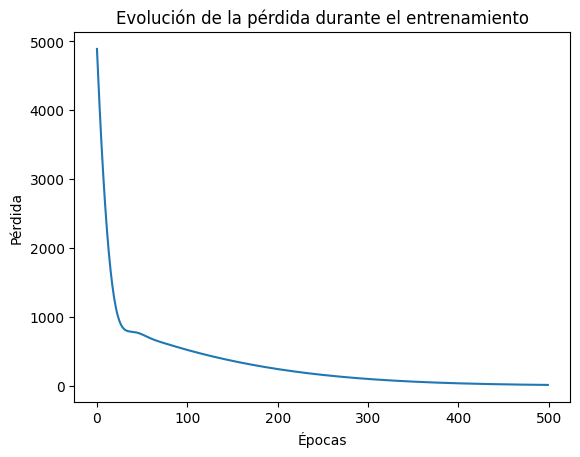

In [7]:
# Visualizamos la evolución de la pérdida

import matplotlib.pyplot as plt

plt.plot(historial_muy_entrenado.history['loss'])
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.show()


## Probar el modelo

In [8]:
# Probamos el modelo con un nuevo valor

print("Predicción para 100°C (deberían ser 212ºF):")

nuevo_valor = np.array([[100.0]], dtype=float)  # Forma (1,1)
resultado = model.predict(nuevo_valor, verbose=False)

print(str(resultado))

Predicción para 100°C (deberían ser 212ºF):
[[211.30359]]


Podemos ver el peso y sesgo que se han generado, observando que se parece al resultado que debíamos obtener:

$$
F = 1.8C + 32
$$

Con esos valores, tu modelo ha aprendido la siguiente fórmula:

$$
F \approx 1.7981666 \cdot C + 31.92732
$$

In [9]:
# Mostramos los parámetros aprendidos

weights = model.get_weights()

print("Peso aprendido (w):", weights[0])
print("Sesgo aprendido (b):", weights[1])

Peso aprendido (w): [[1.8251711]]
Sesgo aprendido (b): [28.786482]


## Exportar el modelo

Exportar un modelo de inteligencia artificial para usarlo en la web es un proceso muy común que divide el trabajo en dos partes: **preparar el modelo** y **crear la interfaz web**.

Para que una página web entienda tu red neuronal, primero debemos guardarla en un formato que el navegador pueda leer. Este proceso consta de dos pasos:

1. **Guardado en formato Keras**: Lo más sencillo es guardar todo el modelo (arquitectura y pesos) en un formato keras.

2. **Conversión a TensorFlow.js**: Las páginas web suelen usar una librería llamada TensorFlow.js. Necesitarás instalar una herramienta de conversión (tensorflowjs).  
  Esto generará un archivo .json (la estructura) y archivos binarios (los pesos).

In [10]:
# 1. Guardar el modelo en formato Keras
model.save('modelo_perceptron.keras')

In [11]:
# Paso 2.1. Instalación de la librería, solo una vez
!pip install tensorflowjs

In [12]:
# 2. Convertirlo al formato compatible con la web
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, 'modelo_perceptron_web')

/usr/local/lib/python3.12/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Red neuronal más compleja: red densa

Hasta ahora hemos utilizado un único perceptrón, es decir, una sola neurona.  
Eso nos permitía modelar directamente una relación lineal.

Ahora vamos a construir una red ligeramente más compleja añadiendo dos **capas ocultas densa**.

Aunque el problema de Celsius → Fahrenheit es lineal y puede resolverse con una sola neurona, esta nueva arquitectura nos permitirá observar:

- Cómo se conectan varias neuronas entre sí.
- Cómo se distribuye el aprendizaje entre más pesos y sesgos.
- Cómo puede mejorar la velocidad de convergencia.

El objetivo no es resolver un problema más difícil, sino entender cómo funciona una red con más capacidad.


In [13]:
# Red neuronal densa con DOS capas ocultas
# De momento no nos preocupamos por las funciones de activcación (ya las veremos)
model_densa = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu", input_shape=[1]),  # 1ª capa oculta (8 neuronas)
    tf.keras.layers.Dense(8, activation="relu"),                   # 2ª capa oculta (8 neuronas)
    tf.keras.layers.Dense(1)                                       # Capa de salida (1 valor: Fahrenheit)
])

In [14]:
# Compilación (regresión)
model_densa.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss="mean_squared_error"
)

In [15]:
# Entrenamos
history_densa = model_densa.fit(
    celsius,
    fahrenheit,
    epochs=500,
    verbose=True
)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 3163.7986
Epoch 2/500
1/1 [==============================] - 0s 38ms/step - loss: 2624.9224
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 1971.0540
Epoch 4/500
1/1 [==============================] - 0s 13ms/step - loss: 1239.8835
Epoch 5/500
1/1 [==============================] - 0s 12ms/step - loss: 541.3670
Epoch 6/500
1/1 [==============================] - 0s 13ms/step - loss: 374.0933
Epoch 7/500
1/1 [==============================] - 0s 12ms/step - loss: 973.1215
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 959.6138
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 582.2296
Epoch 10/500
1/1 [==============================] - 0s 11ms/step - loss: 325.6635
Epoch 11/500
1/1 [==============================] - 0s 12ms/step - loss: 289.3993
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 380.7275
Epoch 13/500
1/1 [=====

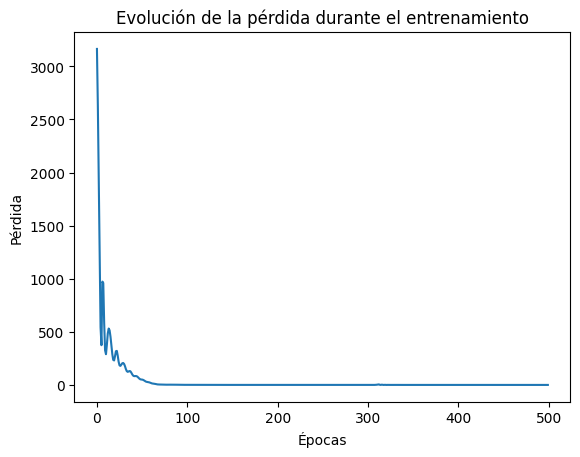

In [16]:
# Ten en cuenta que hemos cambiado nº de épocas y learning_rate
plt.plot(history_densa.history['loss'])
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.title("Evolución de la pérdida durante el entrenamiento")
plt.show()

Con unas 80 épocas ha conseguido llegar a un resultado muy bueno, mientras que el modelo anterior necesitaba cerca de las 200.

In [17]:
# Predicción de prueba
nuevo_valor = np.array([[100.0]], dtype=float)
pred = model_densa.predict(nuevo_valor, verbose=False)

print(f"Predicción para 100°C: {pred[0][0]:.2f} °F (debería ser 212°F)")

Predicción para 100°C: 211.63 °F (debería ser 212°F)


In [18]:
# ✅ Mostrar pesos y sesgos (bias) de TODAS las capas
# En una red con varias capas, habrá MUCHOS más parámetros, por eso ya no es tan interpretable
# como la ecuación lineal F = w*C + b del perceptrón.

for i, layer in enumerate(model_densa.layers):
    w, b = layer.get_weights()  # w: matriz de pesos, b: vector de sesgos
    print(f"\n--- Capa {i+1}: {layer.name} ---")
    print("Pesos (shape):", w.shape)
    print(w)
    print("Sesgos (shape):", b.shape)
    print(b)

# ✅ Resumen del modelo para ver cuántos parámetros hay en total
print("\nResumen del modelo:")
model_densa.summary()



--- Capa 1: dense_1 ---
Pesos (shape): (1, 8)
[[-0.20055361  0.4553368  -0.28022984  0.3823719   0.3628725  -0.3490855
   0.08874658 -0.22944489]]
Sesgos (shape): (8,)
[-2.9839478  4.544831  -3.2003016  3.852725   3.6555796 -3.3791149
  3.7581954 -3.5167215]

--- Capa 2: dense_2 ---
Pesos (shape): (8, 8)
[[-0.14273551 -1.0109034   0.08170405 -0.88395005  0.32769433 -0.13546653
   0.96454203 -0.27705452]
 [-0.6647588  -0.5207507   0.48738998 -0.05660971 -0.06494749 -0.38061374
  -0.73639005  1.0124966 ]
 [-0.73356485 -0.6951451   0.12671596 -1.0167482   0.83182794 -0.6874263
   0.69254416 -0.4592399 ]
 [-0.44444418 -0.01337707  0.53603417 -0.1258073  -1.1161678  -0.27300414
  -0.5587673   0.6429739 ]
 [-0.45555794  0.49143213  0.55458933  0.38784254 -1.0075549   0.31044948
  -1.3233291   0.97970545]
 [-0.15863499 -0.45256433  0.08446688 -0.513513    1.122121   -0.43615714
   0.9065097  -0.16728218]
 [-0.3273116  -0.5892824  -0.12172161 -0.2258181  -0.25959864 -0.36525014
  -0.16801137 

## Interpretación red neuronal densa

## 🔎 ¿Qué significa **Param #**?

**Param #** indica el número total de parámetros entrenables en esa capa.

Es decir:

👉 Número total de **pesos + sesgos (bias)** que la red debe aprender.

Cada uno de esos parámetros se ajusta durante el entrenamiento.

---

## Vamos capa por capa

### Primera capa: `(None, 8)` → 16 parámetros

Tienes:

* 1 entrada
* 8 neuronas

Cada neurona tiene:

* 1 peso (porque hay 1 entrada)
* 1 sesgo

Entonces:

```
(1 peso × 8 neuronas) + (8 sesgos) = 8 + 8 = 16
```

✔ Coincide con lo que muestra: **16**

---

### 🟢 Segunda capa: `(None, 8)` → 72 parámetros

Ahora la capa anterior tiene 8 neuronas.

Eso significa:

* 8 entradas
* 8 neuronas

Cada neurona tiene:

* 8 pesos
* 1 sesgo

Entonces:

```
(8 × 8) + 8 = 64 + 8 = 72
```

✔ Coincide: **72**

---

### 🟢 Capa de salida: `(None, 1)` → 9 parámetros

Tiene:

* 8 entradas
* 1 neurona

Entonces:

```
(8 × 1) + 1 = 8 + 1 = 9
```

✔ Coincide: **9**

---

## Total de parámetros

Si los sumas:

```
16 + 72 + 9 = 97 parámetros
```

Eso significa que esta red está ajustando **97 números distintos**.

Compáralo con el perceptrón inicial:

* Solo tenía 2 parámetros (w y b).

Por eso ya no es interpretable.

Antes:

[
F = 1.8C + 32
]

Ahora:

* 97 parámetros
* Varias combinaciones intermedias
* Transformaciones no lineales

Ya no puedes escribir una ecuación simple.

## Exportar el modelo

In [19]:
# 1. Guardar el modelo en formato Keras
model_densa.save('modelo_densa.keras')

In [20]:
# 2. Convertirlo al formato compatible con la web
tfjs.converters.save_keras_model(model_densa, 'modelo_densa_web')